# Find best model precision threshold

In [10]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import shutil
import math
from sklearn.metrics import precision_score, recall_score, f1_score
import subprocess
import csv
import seaborn as sns

In [2]:
model = 'yolov5s_data_augmentation'
DATA_SET_PATH = '/home/rodri/Downloads/Videos'

DATA_PATH = os.path.join(DATA_SET_PATH, 'reports', model, 'metrics')

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, 'merged.csv'))
df.head()

,path,class_x,class_y,bbox,conf
0,/home/rodri/Downloads/Videos/dataset/backgroun...,0,0,"{'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}",0.0
1,/home/rodri/Downloads/Videos/dataset/backgroun...,0,0,"{'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}",0.0
2,/home/rodri/Downloads/Videos/dataset/backgroun...,0,0,"{'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}",0.0
3,/home/rodri/Downloads/Videos/dataset/backgroun...,0,0,"{'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}",0.0
4,/home/rodri/Downloads/Videos/dataset/backgroun...,0,0,"{'xmin': 0, 'ymin': 0, 'xmax': 0, 'ymax': 0}",0.0


## Getting best precision for guns by confidence threshold

In [19]:
new_trues = [x for x in df['class_x'] if x != 2]
new_preds = [x for x,y in zip(df['class_y'], df['class_x']) if y != 2]
confidences = [x for x,y in zip(df['conf'], df['class_x']) if y != 2]
print(len(new_trues), len(new_preds), len(confidences))
accuracies = []
last_new_preds = []

for i in tqdm(range(0,101)):
    sub_new_preds = [x if y >= i/100 else 0 for x,y in zip(new_preds, confidences)]
    
    last_new_preds = sub_new_preds
    accuracies.append(f1_score(new_trues, sub_new_preds, average='macro'))

420 420 420


100%|██████████| 101/101 [00:00<00:00, 330.75it/s]


Best confidence:  56
Precision:  0.8210612165402734


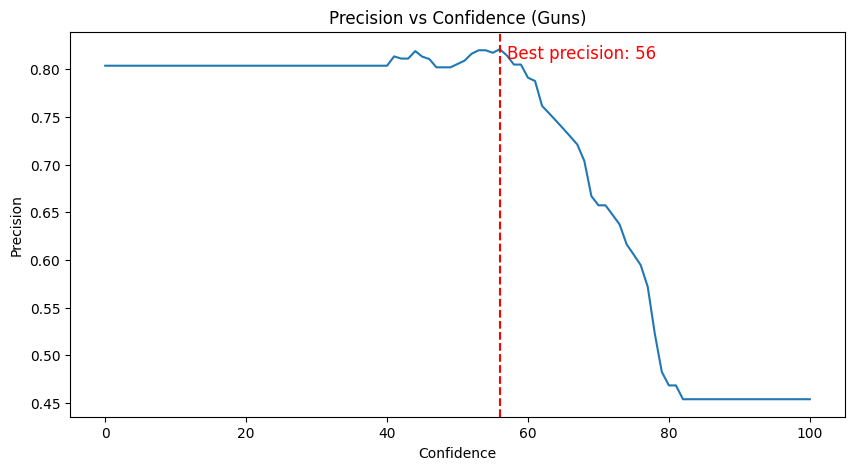

In [20]:
# Plot accuracies

plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.title('Precision vs Confidence (Guns)')
plt.xlabel('Confidence')
plt.ylabel('Precision')

# Draw best confidence
max_acc = max(accuracies)
max_acc_index = accuracies.index(max_acc)
print('Best confidence: ', max_acc_index)
print('Precision: ', max_acc)
plt.axvline(x=max_acc_index, color='r', linestyle='--')
# Adding text
plt.text(max_acc_index+1, max_acc-0.01, 'Best precision: '+str(max_acc_index), fontsize=12, color='r')
plt.show()

## Getting best precision for knives by confidence threshold

In [21]:
new_trues = [x for x in df['class_x'] if x != 1]
new_preds = [x for x,y in zip(df['class_y'], df['class_x']) if y != 1]
confidences = [x for x,y in zip(df['conf'], df['class_x']) if y != 1]

accuracies = []
last_new_preds = []

for i in tqdm(range(0,101)):
    sub_new_preds = [x if y >= i/100 else 0 for x,y in zip(new_preds, confidences)]
    
    last_new_preds = sub_new_preds
    accuracies.append(f1_score(new_trues, sub_new_preds, average='macro'))

100%|██████████| 101/101 [00:00<00:00, 316.18it/s]


Best confidence:  79
Precision:  0.46164021164021163


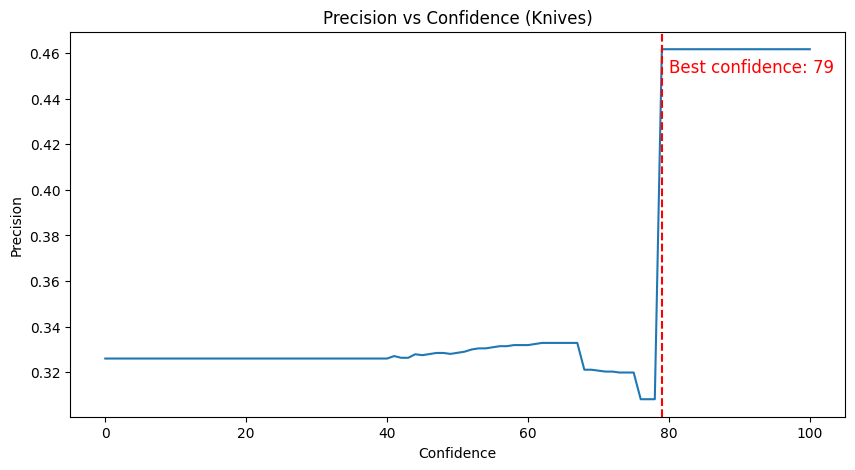

In [22]:
# Plot accuracies

plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.title('Precision vs Confidence (Knives)')
plt.xlabel('Confidence')
plt.ylabel('Precision')

# Draw best confidence
max_acc = max(accuracies)
max_acc_index = accuracies.index(max_acc)
print('Best confidence: ', max_acc_index)
print('Precision: ', max_acc)
plt.axvline(x=max_acc_index, color='r', linestyle='--')
# Adding text
plt.text(max_acc_index+1, max_acc-0.01, 'Best confidence: '+str(max_acc_index), fontsize=12, color='r')
plt.show()